<a href="https://colab.research.google.com/github/HJ-Kurt-Su/ml-train/blob/main/pca_minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


5


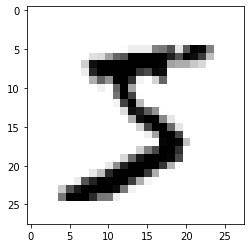

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train[0])
# plt.imshow(x_train[0], cmap="RdBu")
# plt.imshow(x_train[0], cmap="RdBu_r") inverse color map
print(y_train[0])
plt.imshow(x_train[0], cmap="gray_r")

In [36]:
# Check shape & reshape to 2D dataframe
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [37]:
# x_train_reshape = x_train.reshape(60000, -1) -1 means 自己算對應的 column, -1 只能填一個位置
x_train_reshape = x_train.reshape(60000, 784)
x_test_reshape = x_test.reshape(10000, 784)
pd.DataFrame(x_train_reshape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
x_train_pca = pca.fit_transform(x_train_reshape)
x_test_pca = pca.transform(x_train_reshape)
# pca.explained_variance_ratio_
print(sum(pca.explained_variance_ratio_))


0.730540665184482


In [39]:
# 分類: x_train_pca, y_train
# 分群: x_train_pca
pd.DataFrame(x_train_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,123.932589,-312.674261,-24.514054,-555.757959,-27.296666,-232.476268,233.995664,159.798879,-363.515917,198.428477,197.493158,-254.057803,-113.491716,749.314894,219.279799,-4.724966,330.304329,309.163016,277.663850,165.645249,28.348702,-65.321067,-217.952816,250.744726,44.619316,104.730582,-311.499453,165.254142,-123.691324,-119.480769
1,1011.718376,-294.857038,596.339562,-460.766195,-827.275224,-181.950547,-45.020488,-104.969360,40.460222,150.965730,-286.490142,-107.335327,-319.189033,90.903209,-237.883915,-161.924131,-54.101536,39.583967,52.241296,-101.815152,210.114236,-84.189078,-0.693132,19.391189,232.378642,213.682404,14.770027,51.617349,-360.871991,-86.861272
2,-51.849608,392.173153,-188.509750,521.011343,-306.680725,-1.835372,-859.047179,368.591854,-114.546526,-178.508459,450.546071,-158.888293,187.004418,109.216280,-144.818979,-191.322417,169.616712,-122.144137,-9.200143,-434.301666,-61.655869,-4.162911,119.980797,-6.153209,-129.154130,84.781319,174.697787,138.308240,11.618044,-279.094265
3,-799.127037,-607.197218,273.651241,105.878238,-1.853225,699.654703,-473.713155,-67.321473,302.731178,11.112164,-432.468511,-175.025181,243.893606,165.681607,-151.707562,50.774033,10.188463,192.667861,140.557092,132.426019,-65.073226,-123.992241,59.899422,-95.153159,129.292049,12.475241,-275.684692,141.087399,8.481196,-121.113886
4,-382.754942,730.542867,16.353746,-241.697520,98.161347,43.229723,-91.666571,-405.555107,225.501452,104.111511,-347.754357,459.659698,-256.189164,-314.215265,59.314235,-273.669374,19.207631,-179.877804,65.368223,-250.317382,-6.436392,-68.181709,232.652835,5.765384,-2.103202,83.656578,-189.345895,200.652023,-126.893981,74.382973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-99.621760,-293.475561,135.940210,-347.124203,304.275916,236.993993,-498.555480,-237.614892,-494.897342,320.335589,136.986750,243.046688,500.859967,-338.185037,-4.525589,-355.942220,-189.112358,93.300758,35.869495,-2.422482,-84.622103,99.454140,-347.587781,88.733829,10.776363,-31.838679,16.520872,-137.229311,-176.735362,-172.204879
59996,152.757810,-687.899701,-88.932413,-650.013833,198.407548,184.771893,-487.139658,505.333425,-668.867476,27.124994,1.299142,383.553530,69.579273,154.268031,-1.327506,-180.158950,-25.291213,-341.728892,-212.193035,-183.655296,-83.582221,-153.151440,-106.708066,24.689993,-34.236010,-89.428021,75.993467,-71.544292,47.287064,-65.505738
59997,-178.053449,160.078212,-257.613085,-714.650446,-210.315149,-462.462595,-464.535118,-184.823188,-87.525724,268.118599,131.976077,-357.068490,165.050469,113.406959,371.461401,154.942457,8.834823,-37.384838,103.170546,237.688439,-25.797323,-272.364666,-206.421387,-69.070744,-371.275974,-22.899011,-114.707411,-162.481564,-173.874881,-372.710066
59998,130.606072,-5.591937,513.858675,342.703571,-521.165822,-540.554205,-107.376435,140.728878,-16.494697,-93.843018,-13.021788,-176.172520,-424.199735,-81.618875,277.117363,-71.131518,50.266238,-141.942047,-77.753274,196.772519,147.770431,-120.367109,-40.408801,-92.122603,146.944394,443.331002,13.969264,-275.176315,-117.562302,45.985503


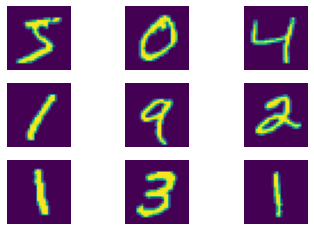

In [40]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.imshow(x_train[i])

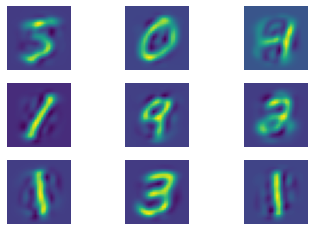

In [41]:
from sklearn.preprocessing import minmax_scale
x_pca_inv = pca.inverse_transform(x_train_pca[:10])
x_pca_inv = minmax_scale(x_pca_inv, axis=1)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.imshow(x_pca_inv[i].reshape(28, 28))

(30, 784)


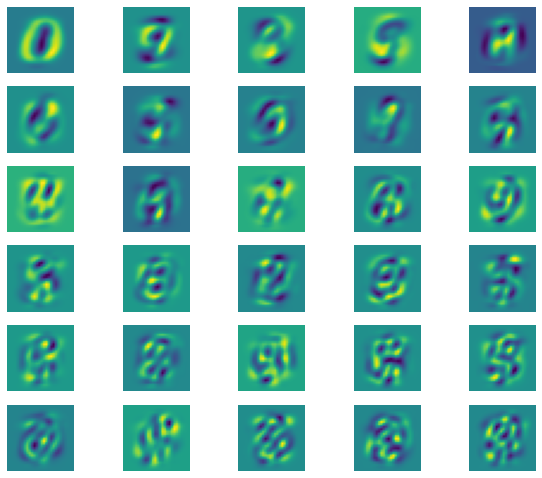

In [42]:
print(pca.components_.shape)
com = minmax_scale(pca.components_, axis=1)
width = 5
height = len(com) // width + 1
plt.figure(figsize=(10, 10))
for i in range(len(com)):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(com[i].reshape(28, 28))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


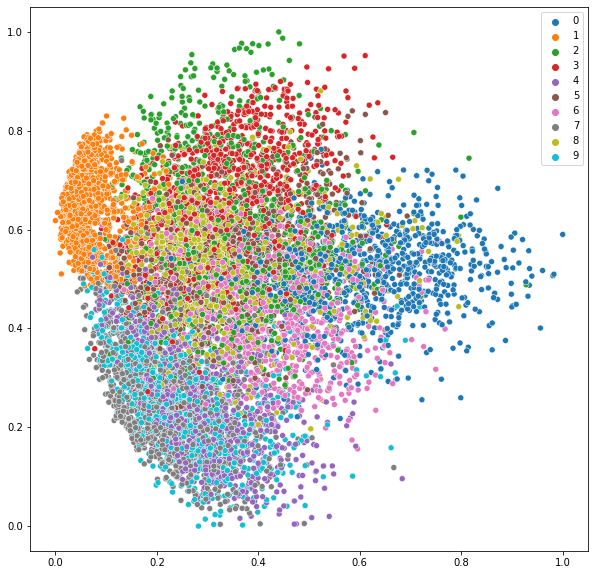

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test_reshape)
scaler = MinMaxScaler()
x_test_pca = scaler.fit_transform(x_test_pca)
plt.figure(figsize=(10, 10))
sns.scatterplot(x_test_pca[:,0],
        x_test_pca[:,1],
        hue=y_test, 
        palette=sns.color_palette("tab10", 10))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


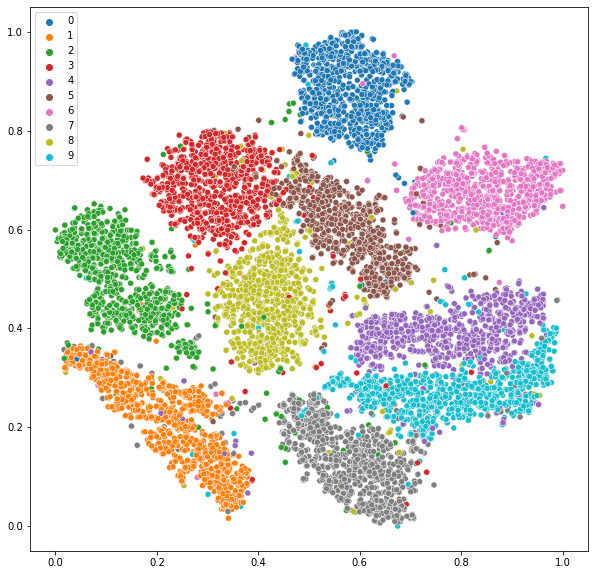

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_test_tsne = tsne.fit_transform(x_test_reshape)
scaler = MinMaxScaler()
x_test_tsne = scaler.fit_transform(x_test_tsne)
plt.figure(figsize=(10, 10))
sns.scatterplot(x_test_tsne[:,0],
        x_test_tsne[:,1],
        hue=y_test, 
        palette=sns.color_palette("tab10", 10))